In [1]:
%load_ext autoreload
%aimport base

In [2]:
%%capture
%run table.ipynb

In [5]:
%matplotlib inline
df = df_w[df_w["$n$"] < 1000]
df

,$n$,$c$,$\nu_8$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
W1,960,10,1.56e-10,0,1.04,28.8,0.111,inf,inf,1,2.63,4.45,49.9,noise_c10nh960Buinf
W5,960,20,1.56e-10,0,1,28.8,0.055,inf,inf,1,3.12,4.88,49.9,noise_c20nh960Buinf
W9,960,40,1.56e-10,0,0.996,28.8,0.0274,inf,inf,1,3.95,6.02,49.8,noise_c40nh960Buinf
W12,960,100,1.56e-10,0,0.999,28.8,0.011,inf,inf,1,5.92,8.72,49.8,noise_c100nh960Buinf
W16,960,400,1.56e-10,0,1.14,28.8,0.00287,inf,inf,1,12.3,15.9,120,noise_c400nh960Buinf
W19,960,700,1.56e-10,0,1.27,28.8,0.0017,inf,inf,1,16.9,19.1,49.8,noise_c700nh960Buinf


In [15]:
import fluidsim as fls
import numpy as np
from base import _k_f, set_figsize, _rxs_str_func, matplotlib_rc, _eps, _k_f
from paths import paths_sim, exit_if_figure_exists


def froude(sim, t_start):
    eps = _eps(sim, t_start)
    c = sim.params.c2 ** 0.5
    L_f = np.pi / _k_f(sim.params)
    F_f = (eps * L_f) ** (1. / 3) / c
    return F_f

# Flatness at $r_x = dx$

In [80]:
path = paths_sim["noise_c10nh960Buinf"]

In [81]:
%%capture
sim = fls.load_state_phys_file(path, merge_missing_params=True)

In [115]:
from fluiddyn.io import stdout_redirected


def flatness_dx(sim, spectrally=False):
    ux_fft = sim.state.get_var("ux_fft")
    px_ux_fft = sim.oper.pxffft_from_fft(ux_fft)
    if spectrally == "mix":
        px_ux = sim.oper.ifft(px_ux_fft)
        px_ux_4 = np.mean(px_ux ** 4)
        px_ux_2 = sim.oper.sum_wavenumbers(abs(px_ux_fft) ** 2)
    elif spectrally == "all":
#         px_ux_4 = sim.oper.sum_wavenumbers(abs(px_ux_fft) ** 4)
        px_ux_4 = sim.oper.sum_wavenumbers(abs(px_ux_fft) ** 4)
        px_ux_2 = sim.oper.sum_wavenumbers(abs(px_ux_fft) ** 2)
    else:
        px_ux = sim.oper.ifft(px_ux_fft)
        px_ux_4 = np.mean(px_ux ** 4)
        px_ux_2 = np.mean(px_ux ** 2)
    print(spectrally)
    print(px_ux_4, px_ux_2)
    return px_ux_4 / px_ux_2 ** 2


def fig_flatness_dx(path, fig, axes, tmin=0, tmax=1000, delta_t=0.5, label='', run_nb=0):
    pass

In [116]:
/print flatness_dx(sim) flatness_dx(sim spectrally="all") flatness_dx(sim spectrally="mix")

False
5301.278773114509 8.531789170398106
all
0.007400424685329199 8.53178882598877
mix
5301.278773114509 8.53178882598877
72.8283402564266 0.00010166616652416852 72.82834613626291


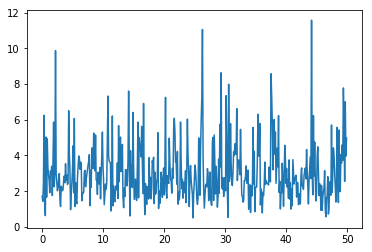

In [47]:
d = sim.output.spatial_means.load()
t = d["t"]
kurt_eta = d["kurt_eta"]
plt.plot(t, kurt_eta)

# Flatness v/s $r_x$

In [17]:
df = df_w[df_w["$n$"] < 1000]
df

,$n$,$c$,$\nu_8$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
W1,960,10,1.56e-10,0,1.04,28.8,0.111,inf,inf,1,2.63,4.45,49.9,noise_c10nh960Buinf
W5,960,20,1.56e-10,0,1,28.8,0.055,inf,inf,1,3.12,4.88,49.9,noise_c20nh960Buinf
W9,960,40,1.56e-10,0,0.996,28.8,0.0274,inf,inf,1,3.95,6.02,49.8,noise_c40nh960Buinf
W12,960,100,1.56e-10,0,0.999,28.8,0.011,inf,inf,1,5.92,8.72,49.8,noise_c100nh960Buinf
W16,960,400,1.56e-10,0,1.14,28.8,0.00287,inf,inf,1,12.3,15.9,120,noise_c400nh960Buinf
W19,960,700,1.56e-10,0,1.27,28.8,0.0017,inf,inf,1,16.9,19.1,49.8,noise_c700nh960Buinf


In [38]:
from fractions import Fraction

def fig_flatness(path, fig, axes, tmin=0, tmax=1000, delta_t=0.5, label='', run_nb=0):
    sim = fls.load_sim_for_plot(path, merge_missing_params=True)
    order = [2, 4]
    key_var = ['uy', 'ux']
    rxs, So_var_dict, deltax = _rxs_str_func(
        sim, order, tmin, tmax, delta_t, key_var, cache=False)

    _label = {'ux': '$F_L$', 'uy': '$F_T$'}
    L_f = np.pi / _k_f(sim.params)
    color_list = ['r', 'b', 'g', 'c', 'm', 'k']
    cond = np.logical_and(rxs > 0.012 * L_f, rxs < 0.06 * L_f)

    F = {}
    F_f = froude(sim, tmin)
    alpha = Fraction(4, 9)

    for i, (key, ax) in enumerate(zip(key_var, axes[:2].ravel())):
        ax.set_xlabel('$r_x/F_f^{' + f'{alpha}' + '}$')
        ax.set_ylabel(f'{_label[key]}')

        # ax.set_title('Flatness of longitundinal and transverse increments')
        # ax.hold(True)
        ax.set_xscale('log')
        ax.set_yscale('log')
        color1 = color_list[run_nb]
        So_4 = So_var_dict['{0}_{1:.0f}'.format(key, 4)]
        So_2 = So_var_dict['{0}_{1:.0f}'.format(key, 2)]
        F[key] = So_4 / So_2 ** 2
        ax.plot(rxs / F_f ** float(alpha), F[key], color1,
                linewidth=1, label=label)

    # axes[2].plot(rxs / F_f, F['uy'] / F['ux'], 'k')
#         ax.plot(rxs[cond] / F_f, F_f / rxs[cond], 'k', linewidth=0.5)
#         x_text = rxs[cond].mean() / F_f
#         y_text = F_f / rxs[cond].mean() * 1.05
#         ax.text(x_text, y_text, '$r^{-1}$')
#         ax.legend(fontsize=7, loc='lower left')


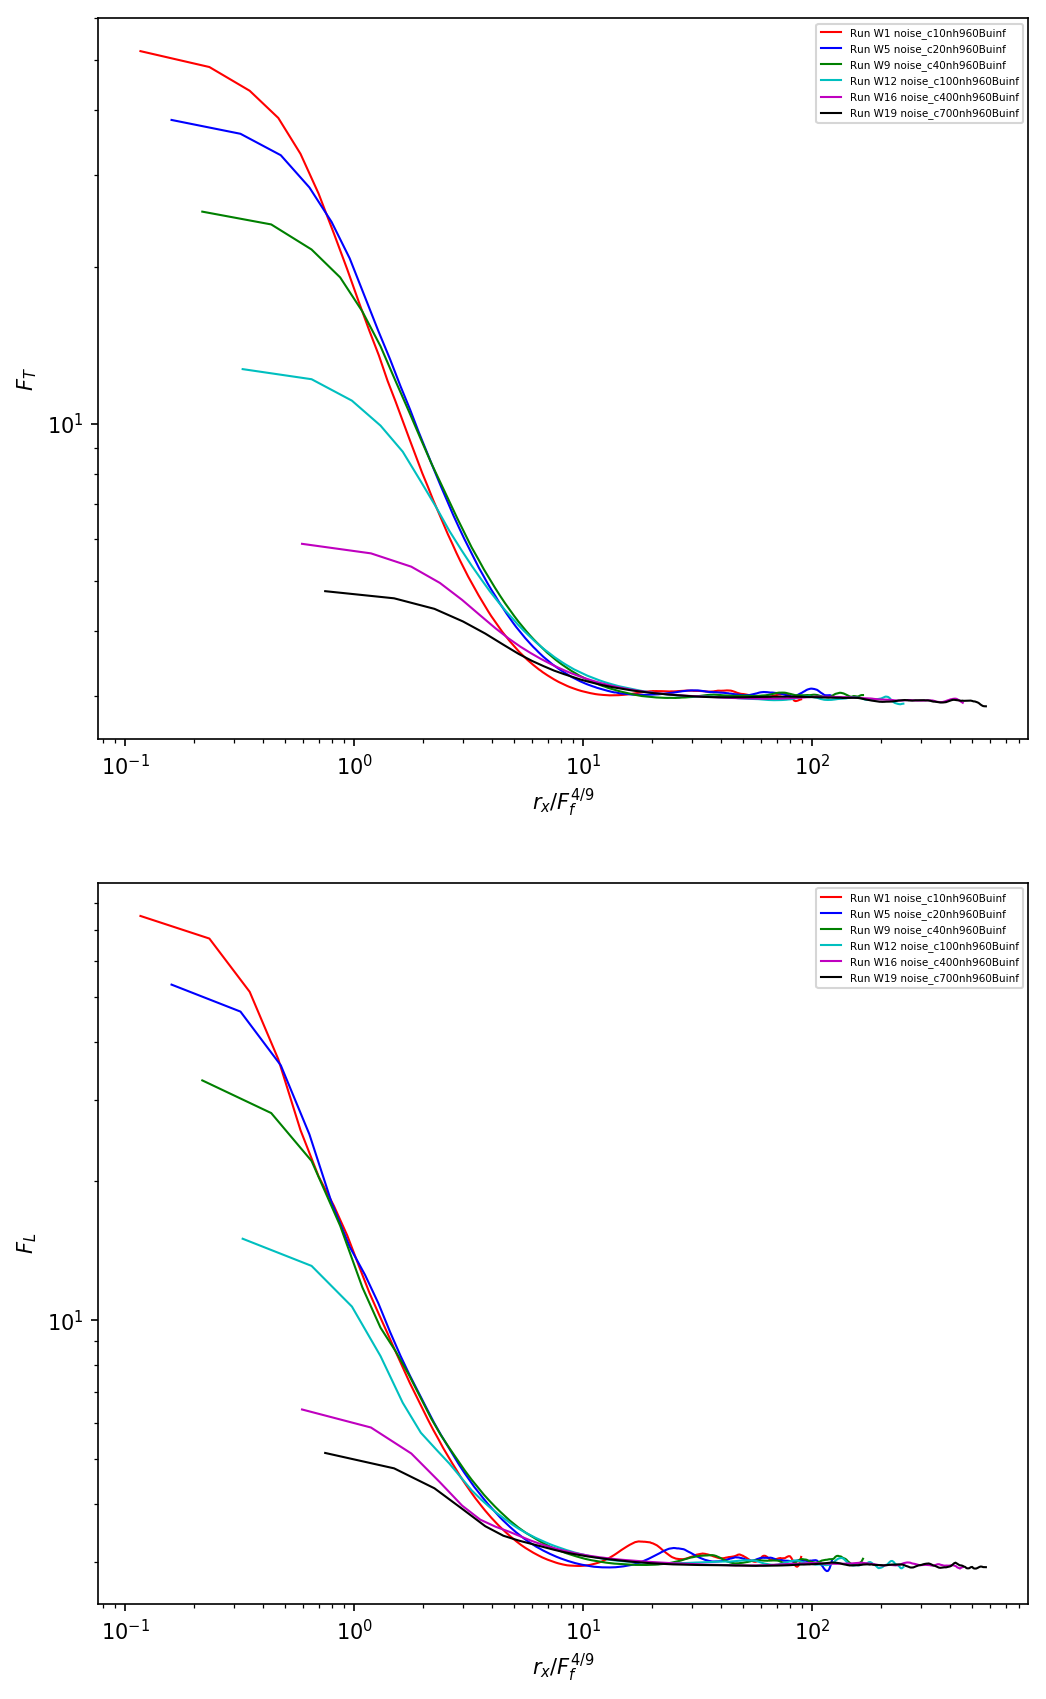

In [39]:
%%capture --no-display
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, dpi=150, figsize=(8,14))
for i in range(len(df)):
    row = df.iloc[i]
    short_name = row["short name"]
    path = paths_sim[short_name]
    tmin = row[r"$t_{stat}$"]
    fig_flatness(path, fig, axes, tmin, label=f"Run {row.name} {short_name}", run_nb=i%6)

for ax in axes:
    ax.legend(fontsize=5)

In [40]:
df = df_w[df_w["$n$"] < 4000]
df

,$n$,$c$,$\nu_8$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
W1,960,10,1.56e-10,0,1.04,28.8,0.111,inf,inf,1,2.63,4.45,49.9,noise_c10nh960Buinf
W2,1920,10,9.68e-13,0,1.06,57.7,0.112,inf,inf,1,3.01,4.66,49.8,noise_c10nh1920Buinf
W3,3840,10,6e-15,0,1.1,115,0.113,inf,inf,1,3.6,5.22,49.9,noise_c10nh3840Buinf
W5,960,20,1.56e-10,0,1,28.8,0.055,inf,inf,1,3.12,4.88,49.9,noise_c20nh960Buinf
W6,1920,20,9.69e-13,0,1.02,57.7,0.0553,inf,inf,1,3.64,5.61,120,noise_c20nh1920Buinf
W7,3840,20,6.01e-15,0,1.08,115,0.0563,inf,inf,1,4.49,6.92,120,noise_c20nh3840Buinf
W9,960,40,1.56e-10,0,0.996,28.8,0.0274,inf,inf,1,3.95,6.02,49.8,noise_c40nh960Buinf
W10,1920,40,9.68e-13,0,0.998,57.7,0.0274,inf,inf,1,4.78,7.12,49.8,noise_c40nh1920Buinf
W11,3840,40,6e-15,0,1.06,115,0.028,inf,inf,1,6.07,8.72,49.8,noise_c40nh3840Buinf
W12,960,100,1.56e-10,0,0.999,28.8,0.011,inf,inf,1,5.92,8.72,49.8,noise_c100nh960Buinf


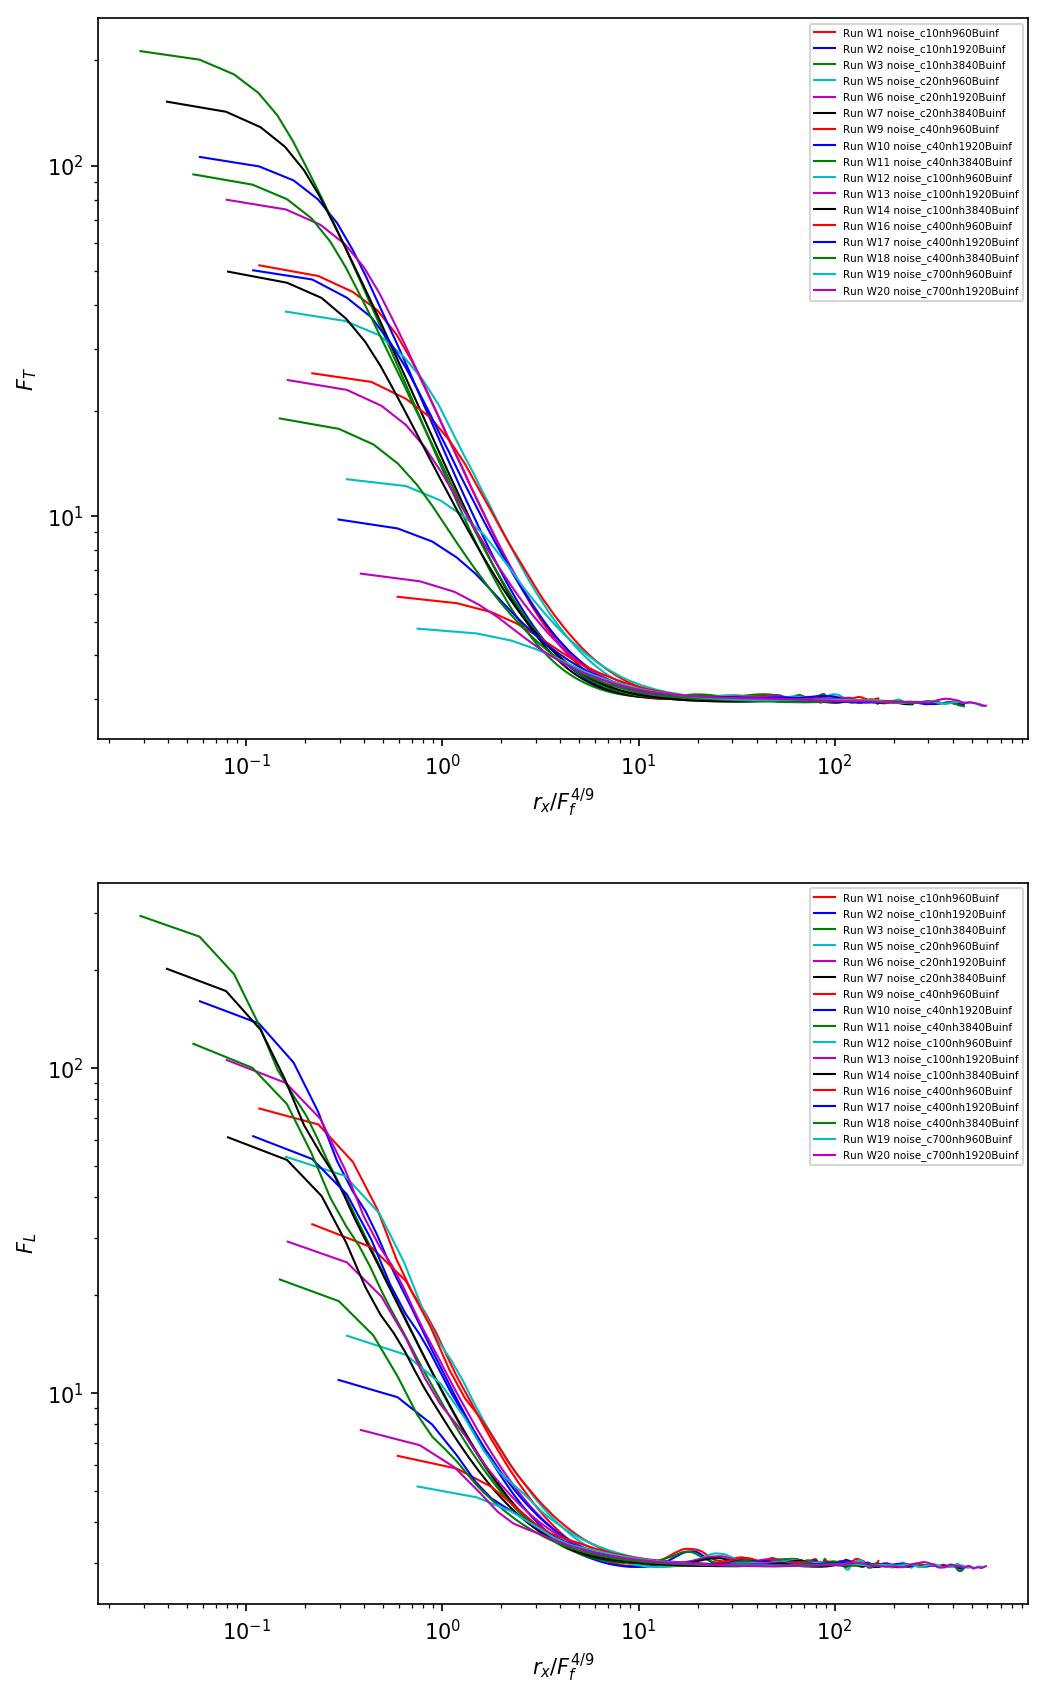

In [41]:
%%capture --no-display
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, dpi=150, figsize=(8,14))
for i in range(len(df)):
    row = df.iloc[i]
    short_name = row["short name"]
    path = paths_sim[short_name]
    tmin = row[r"$t_{stat}$"]
    fig_flatness(path, fig, axes, tmin, label=f"Run {row.name} {short_name}", run_nb=i%6)

for ax in axes:
    ax.legend(fontsize=5)